## Defining the Problem

We need to create a strong sentiment analysis tool that can automatically categorize customer opinions in 
Amazon product reviews as either Positive, Negative, or Neutral.

## Table of Contents

## 1.Gather Data

In [2]:
import os 
os.chdir('C:\\Users\\sai raj\\OneDrive\\Desktop\\NLPWorkshop')

In [6]:
pd.set_option('display.max_colwidth',150)

In [7]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
dataset=pd.read_csv('Amazon_Sentiment_Text.csv')

In [9]:
dataset.head(10)

,sentiment,Text
0,1,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew t...
1,0,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor i...
2,0,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut..."
3,0,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (...
4,1,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,0,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, pep..."
6,1,This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck tog...
7,1,This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,1,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,1,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [10]:
dataset.sample()

,sentiment,Text
676,1,These potato chips are DELICIOUS! I have not had potato chips in approximately two years as it has been difficult to find organic chips. Amazon ...


In [11]:
dataset.shape

(1999, 2)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1999 non-null   int64 
 1   Text       1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [13]:
Text=dataset['Text']

In [14]:
print(Text)

0       I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew t...
1       Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor i...
2       This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut...
3       If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (...
4                Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.
                                                                                ...                                                                          
1994    This is a delicious recipe and ingredients a

## 2.Data Preprocessing

Lowercasing

In [15]:
def clean_Text(Text):     
    #remove unwanted white spaces 
    Text=re.sub(r'\s+',' ',Text)     
    #remove any characters which are not alphabets 
    Text=re.sub(r'[^a-zA-Z#]+',' ',Text)     
    #remove any html tags 
    Text=re.sub(r'<.*?>','',Text)     
    #converting to lower 
    Text=Text.lower()     
    return Text

In [16]:
dataset['Text'] = dataset['Text'].apply(lambda x: clean_Text(x))

In [17]:
print(dataset['Text'])

0       i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew th...
1       product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an error or if the vendor inte...
2       this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into ...
3       if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered whi...
4                       great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal 
                                                                                ...                                                                          
1994    this is a delicious recipe and ingredients a

Remove punctuation and special characters

In [18]:
dataset['Text'] = dataset['Text'].str.replace('[^\w\s]', '')

In [19]:
print(dataset['Text'])

0       i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew th...
1       product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an error or if the vendor inte...
2       this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into ...
3       if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered whi...
4                       great taffy at a great price there was a wide assortment of yummy taffy delivery was very quick if your a taffy lover this is a deal 
                                                                                ...                                                                          
1994    this is a delicious recipe and ingredients a

In [20]:
#Removing short words
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join(word for word in x.split() if len(word)>3))
dataset.head(10)

,sentiment,Text
0,1,have bought several vitality canned food products have found them good quality product looks more like stew than processed meat smells better labr...
1,0,product arrived labeled jumbo salted peanuts peanuts were actually small sized unsalted sure this error vendor intended represent product jumbo
2,0,this confection that been around centuries light pillowy citrus gelatin with nuts this case filberts into tiny squares then liberally coated with ...
3,0,looking secret ingredient robitussin believe have found this addition root beer extract ordered which good made some cherry soda flavor very medic...
4,1,great taffy great price there wide assortment yummy taffy delivery very quick your taffy lover this deal
5,0,wild hair taffy ordered this five pound taffy very enjoyable with many flavors watermelon root beer melon peppermint grape only complaint there mu...
6,1,this saltwater taffy great flavors very soft chewy each candy individually wrapped well none candies were stuck together which happen expensive ve...
7,1,this taffy good very soft chewy flavors amazing would definitely recommend buying very satisfying
8,1,right mostly just sprouting this cats grass they love rotate around with wheatgrass
9,1,this very healthy food good their digestion also good small puppies eats required amount every feeding


Tokenization

In [21]:
tk_reviews=dataset['Text'].apply(lambda x: x.split())
tk_reviews.head()

0    [have, bought, several, vitality, canned, food, products, have, found, them, good, quality, product, looks, more, like, stew, than, processed, mea...
1    [product, arrived, labeled, jumbo, salted, peanuts, peanuts, were, actually, small, sized, unsalted, sure, this, error, vendor, intended, represen...
2    [this, confection, that, been, around, centuries, light, pillowy, citrus, gelatin, with, nuts, this, case, filberts, into, tiny, squares, then, li...
3    [looking, secret, ingredient, robitussin, believe, have, found, this, addition, root, beer, extract, ordered, which, good, made, some, cherry, sod...
4                               [great, taffy, great, price, there, wide, assortment, yummy, taffy, delivery, very, quick, your, taffy, lover, this, deal]
Name: Text, dtype: object

Lemmatization or Stemming

In [22]:
import nltk

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tk_reviews = tk_reviews.apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [23]:
print(tk_reviews.head(10))

0    [have, bought, sever, vital, can, food, product, have, found, them, good, qualiti, product, look, more, like, stew, than, process, meat, smell, be...
1        [product, arriv, label, jumbo, salt, peanut, peanut, were, actual, small, size, unsalt, sure, thi, error, vendor, intend, repres, product, jumbo]
2    [thi, confect, that, been, around, centuri, light, pillowi, citru, gelatin, with, nut, thi, case, filbert, into, tini, squar, then, liber, coat, w...
3    [look, secret, ingredi, robitussin, believ, have, found, thi, addit, root, beer, extract, order, which, good, made, some, cherri, soda, flavor, ve...
4                                    [great, taffi, great, price, there, wide, assort, yummi, taffi, deliveri, veri, quick, your, taffi, lover, thi, deal]
5    [wild, hair, taffi, order, thi, five, pound, taffi, veri, enjoy, with, mani, flavor, watermelon, root, beer, melon, peppermint, grape, onli, compl...
6    [thi, saltwat, taffi, great, flavor, veri, soft, chewi, each, can

Handling Missing Values

In [24]:
dataset.dropna(subset=['Text'], inplace=True)

In [25]:
print(dataset['Text'].head(10))

0    have bought several vitality canned food products have found them good quality product looks more like stew than processed meat smells better labr...
1          product arrived labeled jumbo salted peanuts peanuts were actually small sized unsalted sure this error vendor intended represent product jumbo
2    this confection that been around centuries light pillowy citrus gelatin with nuts this case filberts into tiny squares then liberally coated with ...
3    looking secret ingredient robitussin believe have found this addition root beer extract ordered which good made some cherry soda flavor very medic...
4                                                 great taffy great price there wide assortment yummy taffy delivery very quick your taffy lover this deal
5    wild hair taffy ordered this five pound taffy very enjoyable with many flavors watermelon root beer melon peppermint grape only complaint there mu...
6    this saltwater taffy great flavors very soft chewy each candy ind

Dynamic Stopword Removal

In [26]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

frozenset({'by', 'were', 'except', 'can', 'about', 'should', 'eleven', 'own', 'fire', 'among', 'together', 'move', 'amongst', 'yourselves', 'moreover', 'put', 'whose', 'seeming', 'fill', 'beyond', 'might', 'we', 'below', 'hasnt', 'detail', 'thence', 'been', 'our', 'next', 'than', 'anyway', 'eg', 'so', 'twelve', 'these', 'upon', 'whenever', 'they', 'more', 'often', 'latter', 'nothing', 'still', 'side', 'while', 'thereupon', 'wherein', 'it', 'anywhere', 'becomes', 'mill', 'besides', 'everywhere', 'very', 'some', 'also', 'in', 'nor', 'amount', 'through', 'well', 'hereupon', 'every', 'due', 'forty', 'over', 'cannot', 'whereupon', 'sincere', 'everyone', 'you', 'please', 'her', 'this', 'bottom', 'other', 'get', 'may', 'something', 'into', 'mine', 'thru', 'before', 'seem', 'off', 'none', 'two', 'ever', 'along', 'there', 'ours', 'eight', 'de', 'nowhere', 'keep', 'are', 'how', 'show', 'few', 'six', 'but', 'same', 'top', 'indeed', 'us', 'those', 'has', 'cry', 'all', 'from', 'be', 'to', 'someone'

In [27]:
def remove_custom_stopwords(text):
    if isinstance(text, str):  # Check if 'text' is a string
        words = text.split()
        return " ".join([word for word in words if word not in ENGLISH_STOP_WORDS])
    else:
        return text

dataset['Text'] = dataset['Text'].apply(remove_custom_stopwords)

In [28]:
print(dataset['Text'].head(10))

0       bought vitality canned food products good quality product looks like stew processed meat smells better labrador finicky appreciates product better
1                    product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
2    confection centuries light pillowy citrus gelatin nuts case filberts tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavo...
3                                        looking secret ingredient robitussin believe addition root beer extract ordered good cherry soda flavor medicinal
4                                                                      great taffy great price wide assortment yummy taffy delivery quick taffy lover deal
5    wild hair taffy ordered pound taffy enjoyable flavors watermelon root beer melon peppermint grape complaint black licorice flavored pieces just pa...
6    saltwater taffy great flavors soft chewy candy individually wrapp

In [29]:
dataset['Text'][100]

'mouth says love thee count ways like apple products item draw shipping cost heavy'

## 3.Exploratory Data Analysis

Data Visulation

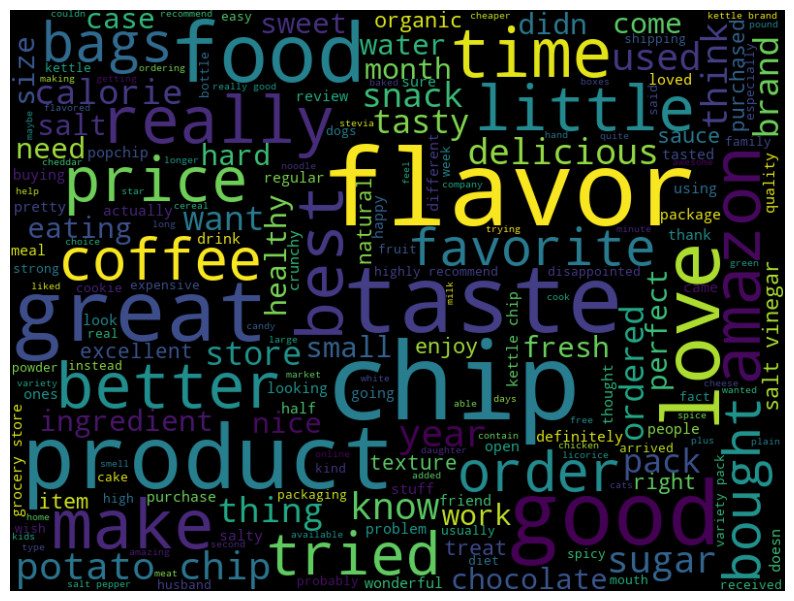

In [30]:
from wordcloud import WordCloud
all_words=' '.join([i for i in dataset['Text']])
wc=WordCloud(width=800,height=600,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

Class Distribution

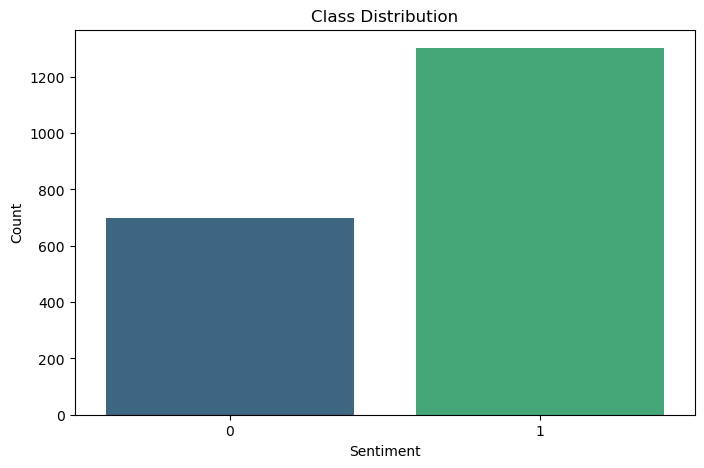

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='sentiment', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [32]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return tokens

dataset['Tokens'] = dataset['Text'].apply(preprocess_text)

In [33]:
from collections import Counter
word_freq = Counter([word for tokens in dataset['Tokens'] for word in tokens])

In [34]:
print(word_freq)

Counter({'chips': 1035, 'like': 822, 'good': 711, 'great': 637, 'flavor': 568, 'taste': 560, 'product': 519, 'love': 485, 'food': 393, 'amazon': 365, 'really': 341, 'best': 296, 'flavors': 289, 'time': 280, 'salt': 275, 'price': 265, 'better': 246, 'tried': 245, 'potato': 244, 'bags': 240, 'little': 239, 'make': 228, 'coffee': 214, 'sugar': 211, 'kettle': 204, 'pack': 185, 'order': 185, 'bought': 181, 'favorite': 181, 'used': 177, 'brand': 170, 'recommend': 166, 'delicious': 158, 'chip': 157, 'store': 155, 'know': 154, 'organic': 146, 'think': 146, 'sweet': 143, 'ordered': 140, 'free': 137, 'snack': 137, 'vinegar': 137, 'regular': 136, 'tasty': 133, 'eating': 128, 'healthy': 127, 'fresh': 127, 'want': 126, 'quality': 125, 'perfect': 123, 'size': 123, 'chocolate': 123, 'different': 119, 'water': 118, 'variety': 118, 'hard': 117, 'nice': 117, 'small': 116, 'ingredients': 116, 'right': 113, 'foods': 113, 'enjoy': 112, 'calories': 111, 'definitely': 110, 'easy': 110, 'spicy': 109, 'local':

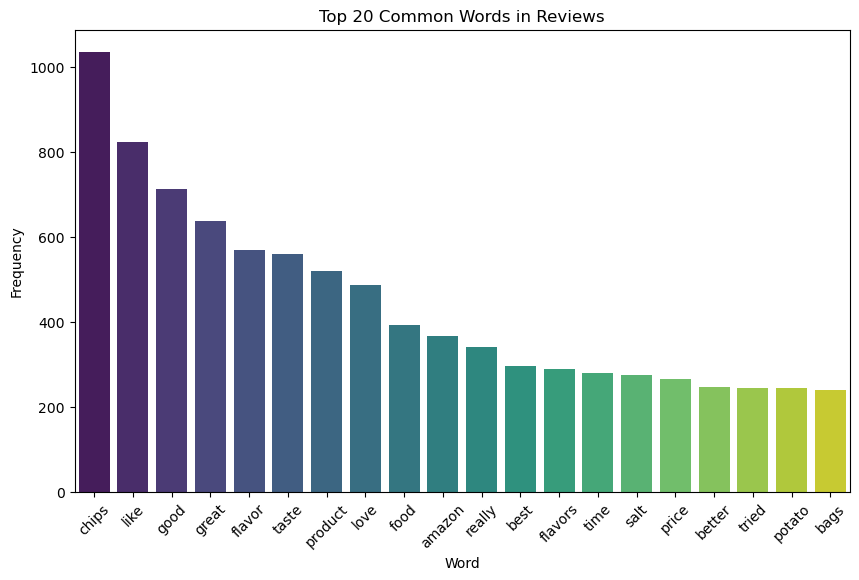

In [35]:
common_words = word_freq.most_common(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='viridis')
plt.title('Top 20 Common Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 4.Feature Engineering

Length Feature

In [36]:
dataset['Text Length'] = dataset['Text'].apply(len)  # Character count

dataset['Word Count'] = dataset['Text'].apply(lambda x: len(x.split()))  # Word count

In [37]:
print(dataset['Text Length'])

0       146
1       133
2       271
3       113
4        83
       ... 
1994    116
1995    190
1996    780
1997    142
1998    184
Name: Text Length, Length: 1999, dtype: int64


In [38]:
print(dataset['Word Count'])

0        20
1        18
2        37
3        15
4        13
       ... 
1994     16
1995     29
1996    111
1997     20
1998     26
Name: Word Count, Length: 1999, dtype: int64


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the entire dataset
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Text'])

# Extract the TF-IDF vector for the first document
tfidf_vector = tfidf_matrix[0]

# Convert the TF-IDF vector to a dense array (if needed)
tfidf_vector = tfidf_vector.toarray()

# Display the TF-IDF vector for the first document
print(tfidf_vector)


[[0. 0. 0. ... 0. 0. 0.]]


In [40]:
from textblob import TextBlob

# Function to get sentiment scores using TextBlob
def get_sentiment_scores(Text):
    analysis = TextBlob(Text)    
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis and create new columns for sentiment scores
dataset['Polarity'], dataset['Subjectivity'] = zip(*dataset['Text'].apply(get_sentiment_scores))

# Display the DataFrame with sentiment scores
print(dataset['Text'],dataset['Polarity'],dataset['Subjectivity'])

0          bought vitality canned food products good quality product looks like stew processed meat smells better labrador finicky appreciates product better
1                       product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
2       confection centuries light pillowy citrus gelatin nuts case filberts tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavo...
3                                           looking secret ingredient robitussin believe addition root beer extract ordered good cherry soda flavor medicinal
4                                                                         great taffy great price wide assortment yummy taffy delivery quick taffy lover deal
                                                                                ...                                                                          
1994                                     delicious r

## 5.Split Data

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", score) 
    print("sentence was rated as ", score['neg']*100, "% Negative") 
    print("sentence was rated as ", score['neu']*100, "% Neutral") 
    print("sentence was rated as ", score['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if score['compound'] >= 0.075 : 
        print("Very Positive") 
  
    elif score['compound'] <= - 0.075 : 
        print("very Negative") 
    elif score['compound'] <= - 0.05 : 
        vsentiment="Negative"
    elif score['compound'] >= 0.05 : 
        vsentiment="Positive" 
    else : 
        print("Neutral")

In [42]:
from afinn import Afinn
afn = Afinn(emoticons=True)

In [43]:
review = dataset['Text'][90]
print(review)

standard poodle pomeranian wonderful food switched different food price couple times going right natural balance


In [44]:
def get_sentimentscore(review):
    score = analyser.polarity_scores(review)
    vander_positive=score['pos']*100
    vander_negative=score['neg']*100
    if score['compound'] >= 0.075 : 
        vsentiment="Very Positive" 
    elif score['compound'] >= 0.05 : 
        vsentiment="Positive" 
    elif score['compound'] <= - 0.075 : 
        vsentiment="very Negative" 
  
    elif score['compound'] <= - 0.05 : 
        vsentiment="Negative" 
  
    else:  
        vsentiment="Neutral" 
       
    afn_score=afn.score(review)
    if(afn_score > 0 and afn_score <3):
        afn_sentiment="Positive"
    elif(afn_score>=3 ):
        afn_sentiment="very Positive"
    elif(afn_score < 0 and afn_score >-3):
        afn_sentiment="Negative"
    elif(afn_score < 0 and afn_score <=-3):
        afn_sentiment="very Negative"
    else:
        afn_sentiment="Neutral" 
    return pd.Series([vander_positive, vander_negative,vsentiment,afn_score,afn_sentiment])

In [45]:
print('Predicted Sentiment polarity:', sentiment_analyzer_scores(review))
print('Predicted Sentiment AFN polarity:', afn.score(review))

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.7351}
sentence was rated as  0.0 % Negative
sentence was rated as  67.7 % Neutral
sentence was rated as  32.300000000000004 % Positive
Sentence Overall Rated As Very Positive
Predicted Sentiment polarity: None
Predicted Sentiment AFN polarity: 5.0


In [46]:
dataset[['vander_positive', 'vander_negative', 'vsentiment','afn_score','afn_sentiment']]=dataset['Text'].apply(get_sentimentscore)

In [47]:
dataset

,sentiment,Text,Tokens,Text Length,Word Count,Polarity,Subjectivity,vander_positive,vander_negative,vsentiment,afn_score,afn_sentiment
0,1,bought vitality canned food products good quality product looks like stew processed meat smells better labrador finicky appreciates product better,"[bought, vitality, canned, food, products, good, quality, product, looks, like, stew, processed, meat, smells, better, labrador, finicky, apprecia...",146,20,0.566667,0.533333,54.5,0.0,Very Positive,16.0,very Positive
1,0,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,"[product, arrived, labeled, jumbo, salted, peanuts, peanuts, actually, small, sized, unsalted, sure, error, vendor, intended, represent, product, ...",133,18,0.216667,0.762963,11.0,12.9,very Negative,-2.0,Negative
2,0,confection centuries light pillowy citrus gelatin nuts case filberts tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavo...,"[confection, centuries, light, pillowy, citrus, gelatin, nuts, case, filberts, tiny, squares, liberally, coated, powdered, sugar, tiny, mouthful, ...",271,37,0.187000,0.548000,29.8,14.1,Very Positive,4.0,very Positive
3,0,looking secret ingredient robitussin believe addition root beer extract ordered good cherry soda flavor medicinal,"[looking, secret, ingredient, robitussin, believe, addition, root, beer, extract, ordered, good, cherry, soda, flavor, medicinal]",113,15,0.150000,0.650000,17.2,0.0,Very Positive,3.0,very Positive
4,1,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,"[great, taffy, great, price, wide, assortment, yummy, taffy, delivery, quick, taffy, lover, deal]",83,13,0.458333,0.600000,63.1,0.0,Very Positive,9.0,very Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,delicious recipe ingredients pricy mind price point makes wonderful waffle combine waring waffle maker waffle heaven,"[delicious, recipe, ingredients, pricy, mind, price, point, makes, wonderful, waffle, combine, waring, waffle, maker, waffle, heaven]",116,16,1.000000,1.000000,45.1,0.0,Very Positive,9.0,very Positive
1995,1,laugh reviews said work little butter worth cook come perfect everytime crisp outside fluffy inside family loves loves thing different instead ext...,"[laugh, reviews, said, work, little, butter, worth, cook, come, perfect, everytime, crisp, outside, fluffy, inside, family, loves, loves, thing, d...",190,29,0.246250,0.356667,47.2,0.0,Very Positive,15.0,very Positive
1996,1,read favorable reviews pancake amazon quite ordered came outdoor camping stores christmas using make dieting harder honestly enjoyed struggle panc...,"[read, favorable, reviews, pancake, amazon, quite, ordered, came, outdoor, camping, stores, christmas, using, make, dieting, harder, honestly, enj...",780,111,0.294259,0.493704,41.7,3.0,Very Positive,36.0,very Positive
1997,0,expecting great things based reviews good great believe waffles bisquick just tasty costs quite instructions easy follow like canister storage,"[expecting, great, things, based, reviews, good, great, believe, waffles, bisquick, tasty, costs, quite, instructions, easy, follow, like, caniste...",142,20,0.683333,0.733333,52.8,0.0,Very Positive,12.0,very Positive


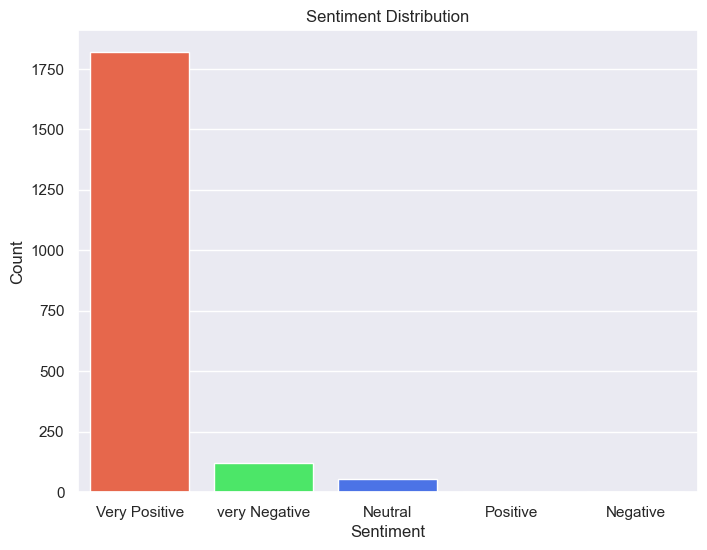

In [48]:
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=dataset, x='vsentiment', palette=custom_palette)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

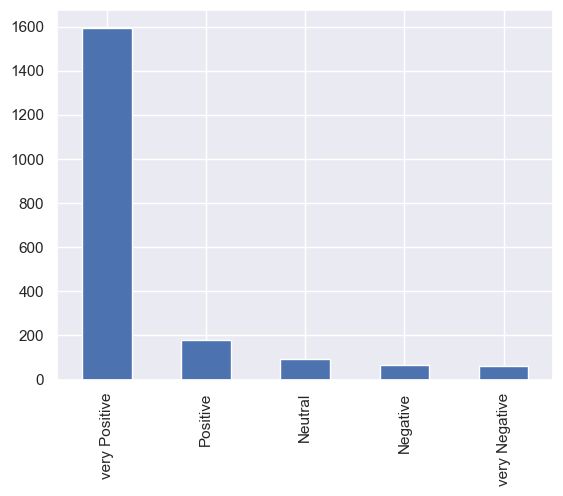

In [49]:
dataset.afn_sentiment.value_counts().plot(kind='bar')

## 6.Choose a Model and Training

Logistic Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['Text'], dataset['sentiment'], test_size=0.1, random_state=42)

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:',accuracy)

report = classification_report(y_test, y_pred)
print(report)

Logistic Regression Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.77      0.32      0.45        75
           1       0.70      0.94      0.80       125

    accuracy                           0.71       200
   macro avg       0.74      0.63      0.63       200
weighted avg       0.73      0.71      0.67       200



Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

# Split the dataset into training and testing sets
X = dataset['Text']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Naive Bayes Accuracy:',accuracy)
print(report)

Naive Bayes Accuracy: 0.695
              precision    recall  f1-score   support

           0       0.81      0.23      0.36       149
           1       0.68      0.97      0.80       251

    accuracy                           0.69       400
   macro avg       0.75      0.60      0.58       400
weighted avg       0.73      0.69      0.64       400



Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Accuracy:',accuracy_rf)
print(report_rf)

Random Forest Accuracy: 0.7225
              precision    recall  f1-score   support

           0       0.77      0.36      0.49       149
           1       0.71      0.94      0.81       251

    accuracy                           0.72       400
   macro avg       0.74      0.65      0.65       400
weighted avg       0.73      0.72      0.69       400



In [61]:
dataset.to_csv('Amazon_senti.csv')

## 7.Conclusion

In this sentiment analysis project, we explored multiple models for classifying text data into sentiment categories and ultimately selected the Random Forest model, which exhibited competitive accuracy and superior F1-scores for both sentiment classes. We emphasized comprehensive metrics, including precision, recall, and F1-score, to evaluate model performance effectively. Data preprocessing, including text cleaning and TF-IDF feature extraction, played a crucial role in preparing the text data for machine learning. 